# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('piercecountyhousesales.csv')

In [38]:
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


<Axes: >

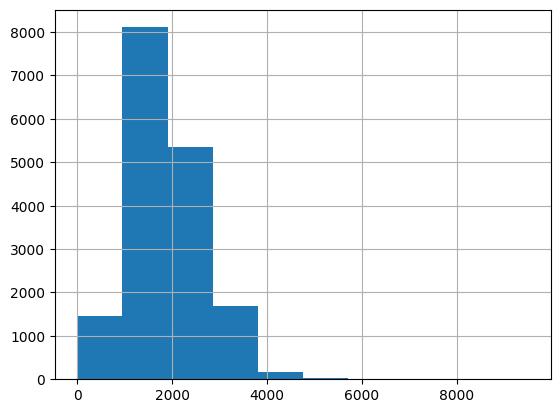

In [39]:
df['house_square_feet'].hist()

In [40]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['sale_date', 'sale_price', 'house_square_feet',
       'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'fireplaces', 'hvac_description', 'exterior', 'interior', 'stories',
       'roof_cover', 'year_built', 'bedrooms', 'bathrooms', 'waterfront_type',
       'view_quality', 'utility_sewer'],
      dtype='object')>

In [41]:
df['waterfront_type'].value_counts()

waterfront_type
WF Lake            225
WF Salt            209
WF Stream/Creek     93
WF River            26
Name: count, dtype: int64

<Axes: >

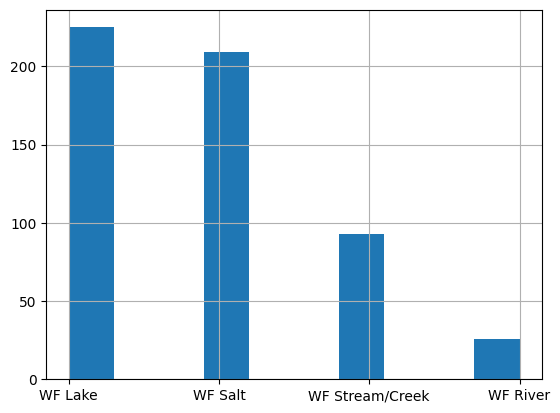

In [42]:
df['waterfront_type'].hist()

In [43]:
df['waterfront_type'].dtypes

dtype('O')

In [44]:
df.isna().sum()


sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   7
exterior                           1
interior                           7
stories                            0
roof_cover                         8
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16261
view_quality                   15895
utility_sewer                      0
dtype: int64

In [45]:
df_2 = df.drop(['waterfront_type', 'view_quality'], axis=1)

<Axes: xlabel='house_square_feet', ylabel='sale_price'>

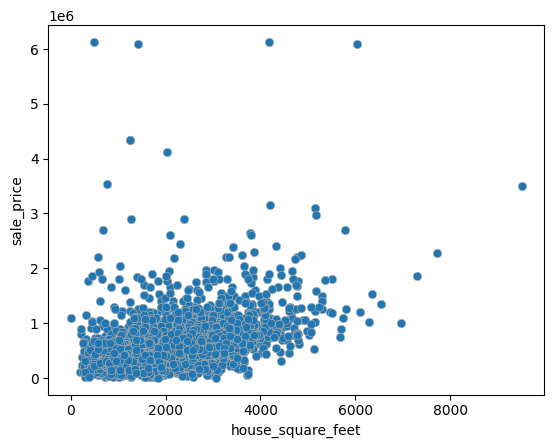

In [46]:
sns.scatterplot(data=df_2,y='sale_price',x='house_square_feet',edgecolor='darkgrey') #there are outliers

<Axes: >

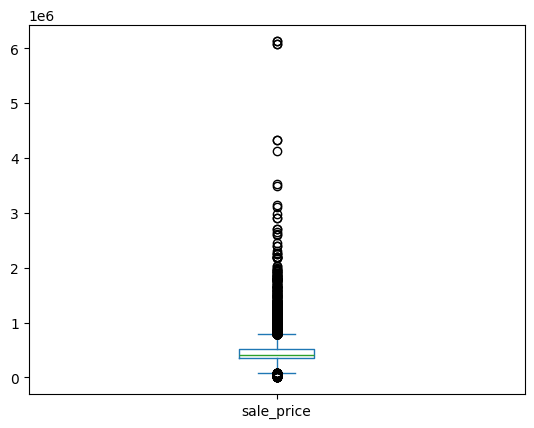

In [47]:
df_2['sale_price'].plot.box()

<Axes: >

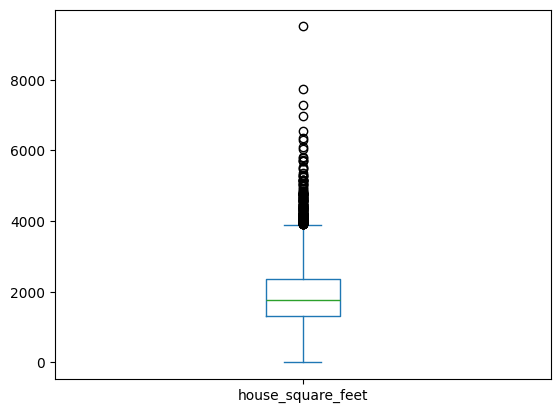

In [48]:
df_2['house_square_feet'].plot.box()

<Axes: >

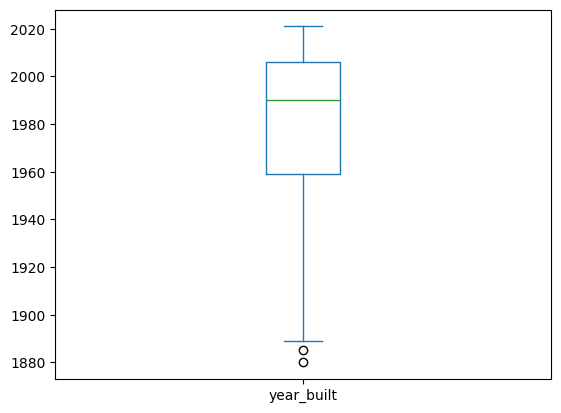

In [49]:
df_2['year_built'].plot.box()

<Axes: xlabel='year_built', ylabel='sale_price'>

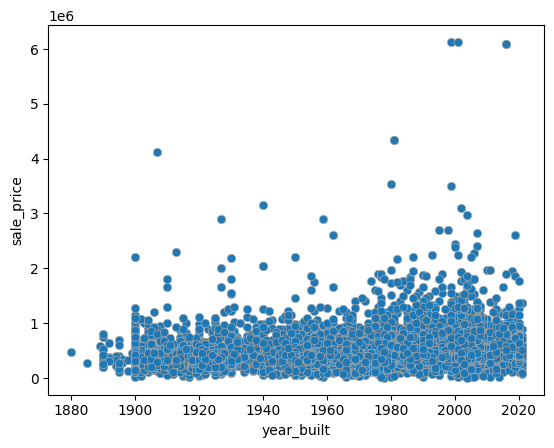

In [50]:
sns.scatterplot(data=df_2,y='sale_price',x='year_built',edgecolor='darkgrey') #there are outliers

In [33]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['sale_date', 'sale_price', 'house_square_feet',
       'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'fireplaces', 'hvac_description', 'exterior', 'interior', 'stories',
       'roof_cover', 'year_built', 'bedrooms', 'bathrooms', 'utility_sewer'],
      dtype='object')>

In [60]:
df_encoded = pd.get_dummies(df_2, columns=['hvac_description', 'exterior', 'interior', 'roof_cover', 'utility_sewer'], drop_first=True)
#one hot encoding categorical variables


In [61]:
df.groupby('waterfront_type')['sale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront_type,,,,,,,,
WF Lake,225.0,8.983759e+05,541708.572122,12510.0,525000.0,775000.0,1200000.0,3500000.0
WF River,26.0,4.476229e+05,336562.404707,25000.0,119900.0,462500.0,635375.0,1225000.0
WF Salt,209.0,1.109730e+06,930367.058887,10000.0,620000.0,900000.0,1260000.0,6130000.0
WF Stream/Creek,93.0,4.960047e+05,222863.303395,50000.0,364000.0,450000.0,615000.0,1538750.0


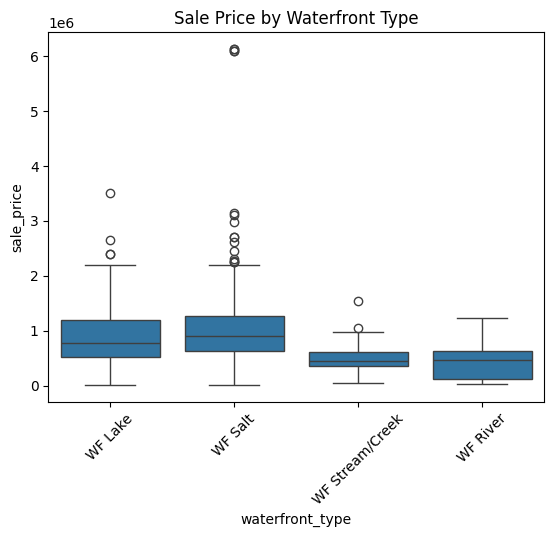

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='waterfront_type', y='sale_price', data=df)
plt.title('Sale Price by Waterfront Type')
plt.xticks(rotation=45)
plt.show()

In [76]:
df_encoded = df_encoded.drop(columns=['sale_date'])  #not really necessary for models; also has weir format

In [77]:
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Training RMSE:", rmse_train)
print("Training R²:", r2_train)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)


Training RMSE: 173242.52973853398
Training R²: 0.4354408807827369
Test RMSE: 200691.39669750637
Test R²: 0.38978101083452554


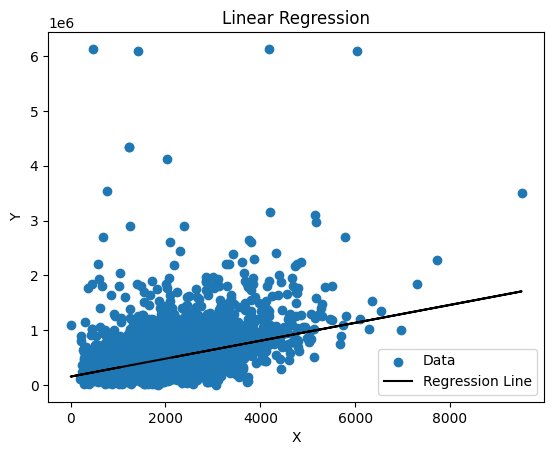

R²: 0.2770


In [139]:
def slr(x,y): 
    """ Single linear regression function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})


x = df['house_square_feet'] # Feature/Covariate
y = df['sale_price'] # Target/Outcome
reg = slr(x,y)

ss_res = np.sum((y - reg['y_hat'])**2)  # Sum of squared residuals
ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Plot data and regression line
plt.scatter(x, y, label='Data')
plt.plot(x, reg['y_hat'], label='Regression Line', color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')

# Show plot
plt.show()

# Print R² value
print(f"R²: {r_squared:.4f}")

In [81]:
pip install seaborn statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


**Correlation Matrix and Partial Correlation Plots**

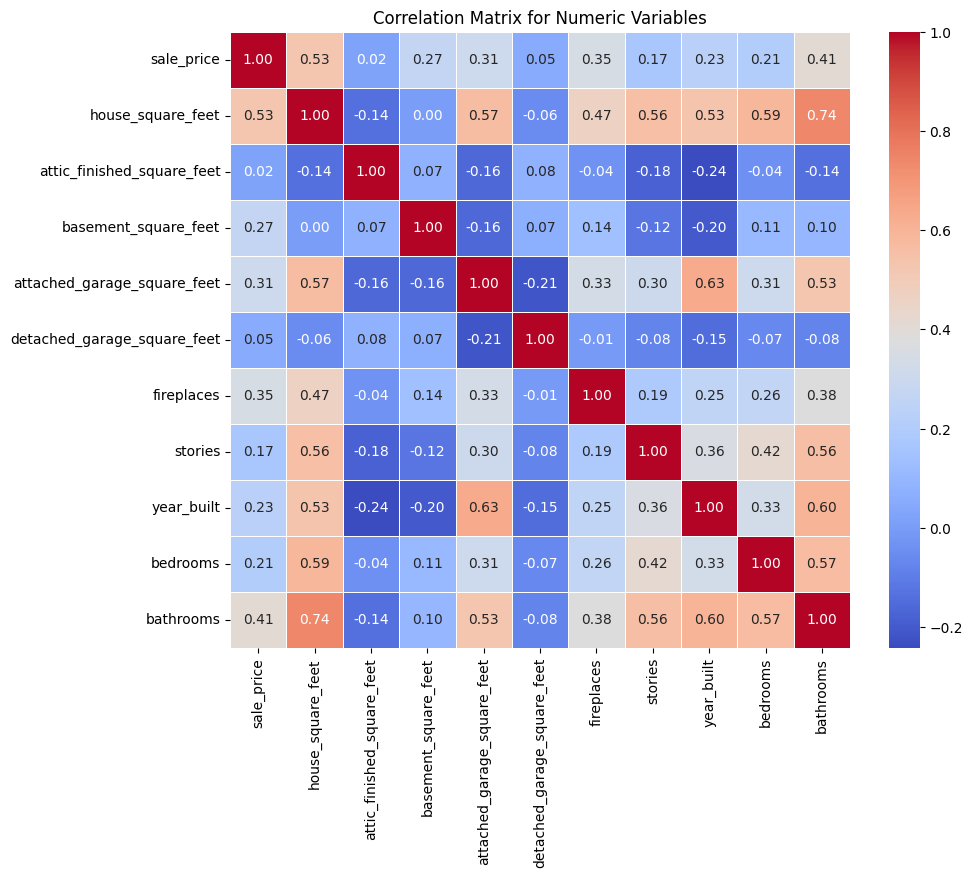

In [104]:
import statsmodels.api as sm
#Get Numeric Data
numeric_data = df_encoded.select_dtypes(include=['float64', 'int64'])

#Correlation Matrix for Numeric Variables
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()

In [94]:
numeric_data.head()

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
0,380000,2157,0,0,528,0,0,2,1993,3,3
1,383000,2238,0,0,396,0,0,2,2017,4,3
2,419900,1452,0,0,0,0,1,1,1965,3,2
3,251660,832,0,0,0,0,0,1,1919,2,1
4,500000,1780,0,384,484,0,1,1,1955,3,2


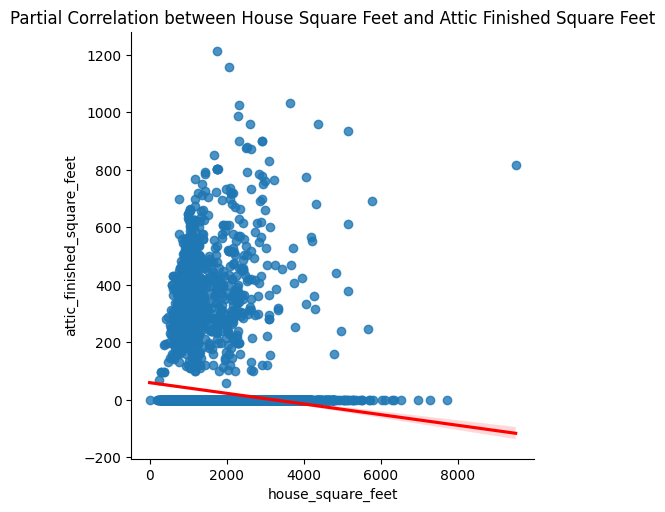

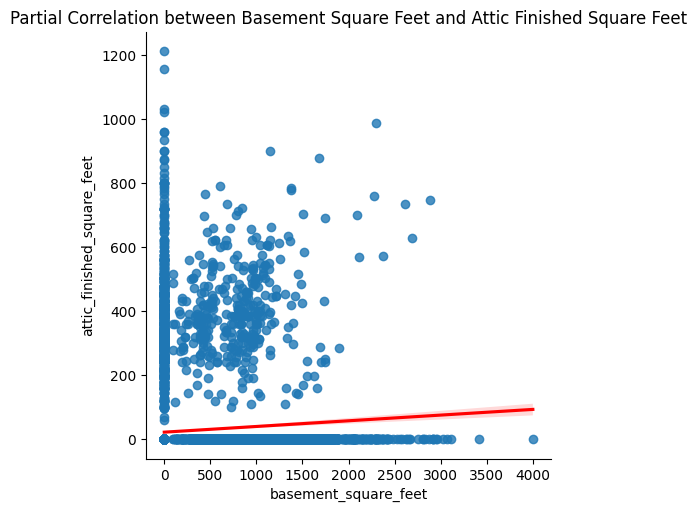

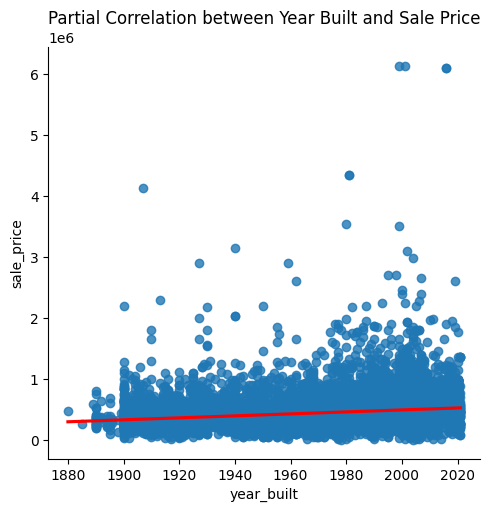

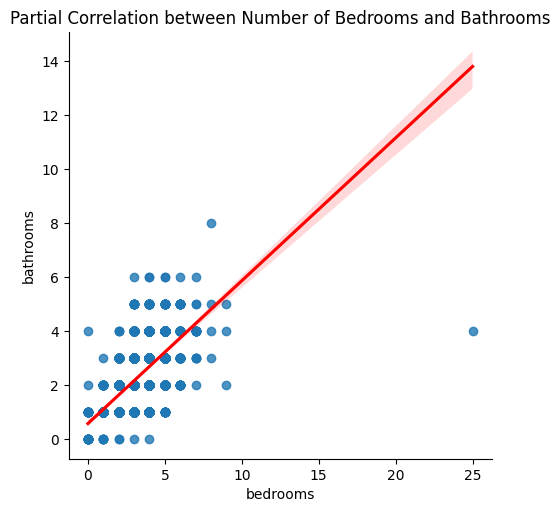

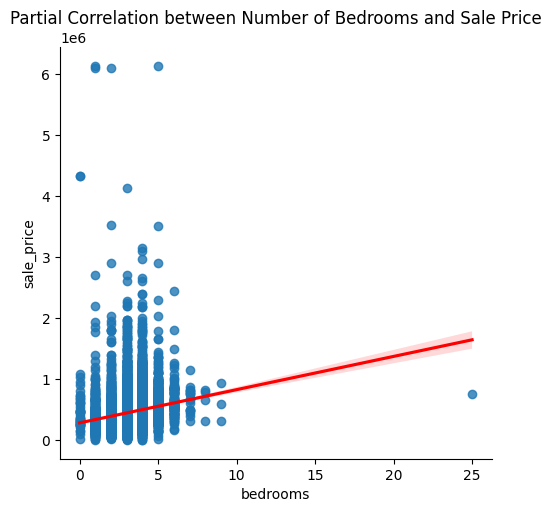

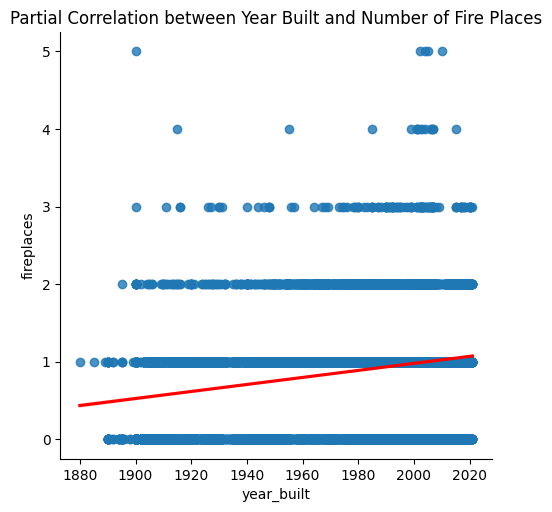

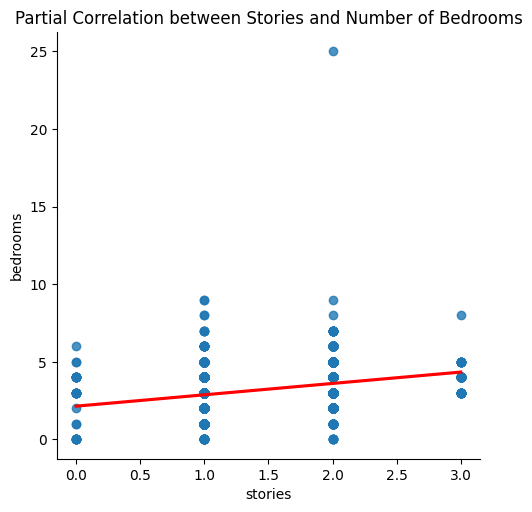

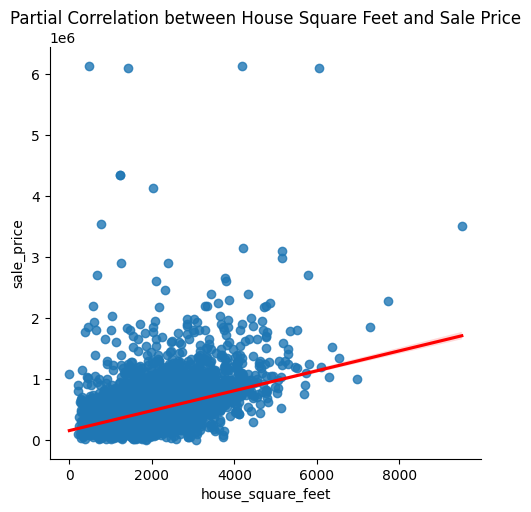

In [103]:
sns.lmplot(x='house_square_feet', y='attic_finished_square_feet', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between House Square Feet and Attic Finished Square Feet")
plt.show()

sns.lmplot(x='basement_square_feet', y='attic_finished_square_feet', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between Basement Square Feet and Attic Finished Square Feet")
plt.show()

sns.lmplot(x='year_built', y='sale_price', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between Year Built and Sale Price")
plt.show()

sns.lmplot(x='bedrooms', y='bathrooms', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between Number of Bedrooms and Bathrooms")
plt.show()

sns.lmplot(x='bedrooms', y='sale_price', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between Number of Bedrooms and Sale Price")
plt.show()

sns.lmplot(x='year_built', y='fireplaces', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between Year Built and Number of Fire Places")
plt.show()

sns.lmplot(x='stories', y='bedrooms', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between Stories and Number of Bedrooms")
plt.show()

sns.lmplot(x='house_square_feet', y='sale_price', data=numeric_data, line_kws={'color': 'red'})
plt.title("Partial Correlation between House Square Feet and Sale Price")
plt.show()

**Models with Interactions and Transformations**

In [116]:
df['square_feet_bedrooms'] = df['house_square_feet'] * df['bedrooms']
df['bathrooms_bedrooms'] = df['bathrooms'] * df['bedrooms']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


features = ['house_square_feet', 'bedrooms', 'bathrooms',
            'square_feet_bedrooms', 'bathrooms_bedrooms', 'year_built', 'stories']
X = df[features]
y = df['sale_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")


Train RMSE: 187814.25, R²: 0.34
Test RMSE: 211979.57, R²: 0.32


In [120]:
df.head()

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer,square_feet_bedrooms,bathrooms_bedrooms
0,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED,6471,9
1,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED,8952,12
2,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED,4356,6
3,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED,1664,2
4,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED,5340,6


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


categorical_vars = ['waterfront_type', 'interior', 'roof_cover', 'exterior', 'hvac_description']  # example
df_cat = df[categorical_vars + ['sale_price']].dropna()

df_encoded = pd.get_dummies(df_cat, drop_first=True)

X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


r2 = r2_score(y_test, y_pred)



y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")


Test RMSE: 806966.45
Test R²: 0.17


In [124]:
df = df[df['house_square_feet'] > 0]


df['log_sqft'] = np.log(df['house_square_feet'])

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['square_ft_bedrooms'] = df['log_sqft'] * df['bedrooms']

features = ['house_square_feet', 'bedrooms', 'bathrooms', 'year_built', 'stories', 'square_ft_bedrooms']
X = df[features]
y = df['sale_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")


Train RMSE: 187827.87, R²: 0.34
Test RMSE: 213309.06, R²: 0.31


R^2 is slightly higher with no interactions included, but the train R^2 goes up when the log of square feet interaction with bedrooms is included; goes down if normal log of square feet is included

In [138]:
#Including Categorical and Numeric Variables Now

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


numeric_vars = ['house_square_feet', 'bedrooms', 'bathrooms', 'year_built']
categorical_vars = ['roof_cover', 'waterfront_type', 'exterior', 'interior']
target = 'sale_price'


df_clean = df[numeric_vars + categorical_vars + [target]].dropna()


df_encoded = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)


X = df_encoded.drop(columns=target)
y = df_encoded[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")


Test RMSE: 717714.37
Test R²: 0.34


R^2 is pretty similar even when categorical and numeric variables are combined.
Most of the relationships appeared to be relatively linear- at least for the ones that seemed to influence the sale price of the house. This demonstrates that major transformations probably were not necessary. This value makes sense as the strongest correlation in the matrix was between house square feet and sale price. When a simple linear regression was performed on this, the r^2 value was .27/.28, so adding in the other features raises this more. THe R^2 and RMSE remained pretty close, which signifies there is not significant overfitting or underfitting happening in the model.